# **Modern Portfolio Theory**

**MPT**, introduced by Harry Markowitz in 1952, is a foundational framework in finance that guides how investors can construct portfolios to maximize expected return based on a given level of market risk (understanding as standard deviation of returns). The theory emphasizes the importance of diversification and quantitatively demonstrates how combining assets with varying correlations can optimize a portfolio's risk-return profile.
## **Key Concepts of MPT**
- *Risk and Return Trade-off*: MPT posits that investors are risk-averse, meaning they prefer less risk for a level of expected return. Therefore, to entice investors to accept higher risk, there must be the potential for higher expected returns. In other words, higher the return, higher the risk.
- *Expected Return*: this is the weighted average of the expected returns of the individual assets in the portfolio. It represents the anticipated return over a specific period. The expected return of each asset is assumed as the mean of historical returns.
- *Portfolio Risk (Volatility)*: unlike individual asset risk, portfolio risk is not just the weighted average of individual risks due to the impact of diversification. it considers the variances of each asset and the covariances between assets.
- *Diversification*: by holding a mix of assets that are not perfectly correlated, investors can reduce the overal risk of the portfolio. The idea is that poor performance of some assets may be offset by better performance of others.
- *Covariance and Correlation*: these statistical measures asses how asset returns move in relation to each other. A lower or negative correlation between assets enhances diversification benefits.
- *Efficient Frontier*: this is a curve representing portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of return. Portfolios on this frontier are considered optimally diversified.
- *Optimal Portfolio Selection*: investors choose a portfolio from the efficient frontier based on their risk tolerance.
  - Risk-Averse: prefer portfolios with lower riesk and are willing to accept lower expected returns.
  - Risk-Tolerant: willing to accept higher risk for the potential of higher expected returns.
- *Risk Free Asset and Capital Market Line (CML)*: by intruducing a risk-free asset, the efficient frontier becomes a stright line known as the CML. The optimal portfolio is tangent to the efficient frontier, representing the best risk-adjusted return.
- *Sharpe Ratio*: a measure to evaluate the performance of an investment by adjusting for its risk. It is calculated as the difference between the portfolio return and the risk-free rate divided by the portfolio's standard deviation. How many units of excess return per unit of risk.

Next, we'll deploy a basic example of how to find the optimal portfolio based on MPT using python.

##**MPT using Python**

First, we will import all the necessary libraries: pandas for data manipulation, yfinance for historical data, numpy for numerical operations and finally matplotlib for data visualization.

In [2]:
# !pip install yfinance

In [1]:
from scipy.optimize import minimize
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then we have to choose which companies we will add to our portfolio and extract historical data according to our needs.

In [3]:
tickers = ['VAPORES.SN', 'NVDA', 'HG=F', 'AMZN', 'TSLA']

In [4]:
data = yf.download(tickers, period='5y')['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [5]:
data.head()

Ticker,AMZN,HG=F,NVDA,TSLA,VAPORES.SN
Date,,,,,
2019-09-25 00:00:00+00:00,88.416496,2.5950,4.434183,15.246667,23.833603
2019-09-26 00:00:00+00:00,86.991997,2.5600,4.412038,16.170668,23.824257
2019-09-27 00:00:00+00:00,86.272499,2.5830,4.273214,16.142000,23.599939
2019-09-30 00:00:00+00:00,86.795502,2.5645,4.330685,16.058001,23.665367
2019-10-01 00:00:00+00:00,86.782501,2.5520,4.328944,16.312668,23.384972


Here we check for missing values ​​and then use forward fill. Once we deal with these missing values, we calculate the returns.

In [6]:
print(data.isnull().sum())

Ticker
AMZN          35
HG=F          34
NVDA          35
TSLA          35
VAPORES.SN    47
dtype: int64


In [7]:
data.fillna(method='ffill', inplace=True)

<ipython-input-7-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [8]:
returns = data.pct_change().dropna()

In [9]:
returns.describe()

Ticker,AMZN,HG=F,NVDA,TSLA,VAPORES.SN
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,0.000849,0.000537,0.003135,0.003014,0.001031
std,0.022076,0.014767,0.033342,0.040912,0.027605
min,-0.140494,-0.066940,-0.184521,-0.210628,-0.326829
25%,-0.010735,-0.008306,-0.015006,-0.017937,-0.009924
50%,0.000203,0.000125,0.002386,0.001655,0.000000
75%,0.012041,0.009795,0.021377,0.021914,0.012025
max,0.135359,0.074642,0.243696,0.198949,0.163899


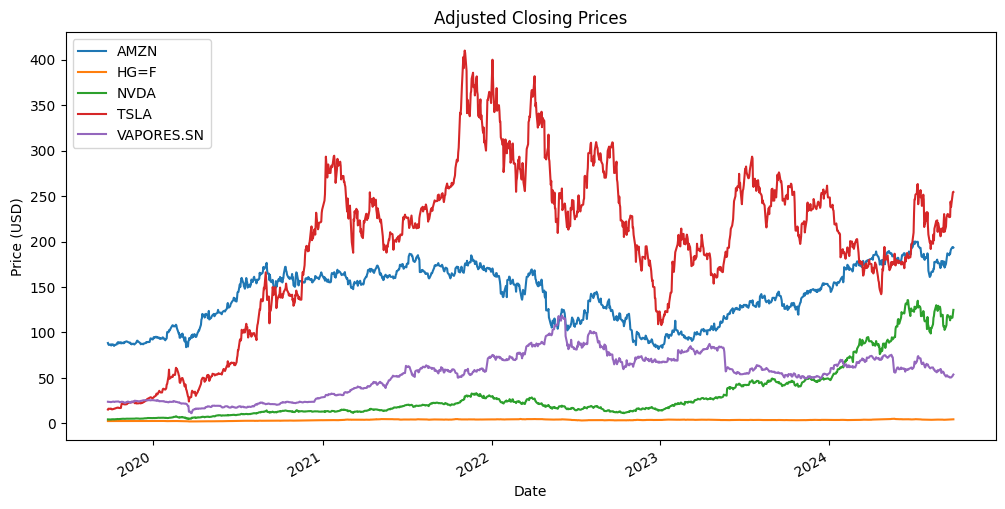

In [10]:
data.plot(figsize=(12, 6))
plt.title('Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.show()

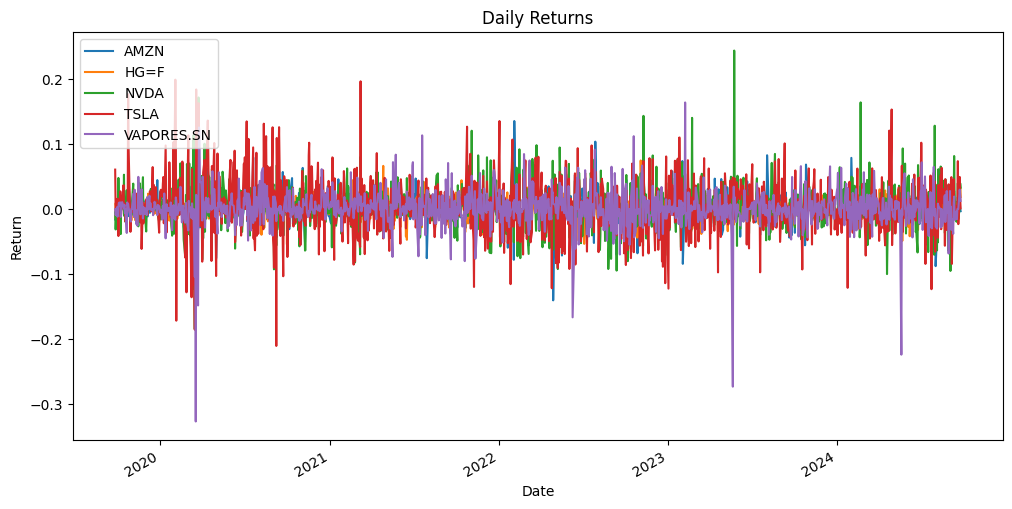

In [11]:
returns.plot(figsize=(12, 6))
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(loc='upper left')
plt.show()

Next, we need to calculate the average of the daily returns and annualize it. We do the same for the covariance matrix. We annualize these elements to align them with the investment periods in terms of investor thinking and comparability, ensuring that return and risk are on the same scale. Also for interpretability, in the sense that an expected annual return of 8% is more intuitive than a daily return of 0.03% for the decision-making process.

In [12]:
mean_daily_returns = returns.mean()
mean_annual_returns = mean_daily_returns * 252

cov_matrix = returns.cov()
annual_cov_matrix = cov_matrix * 252

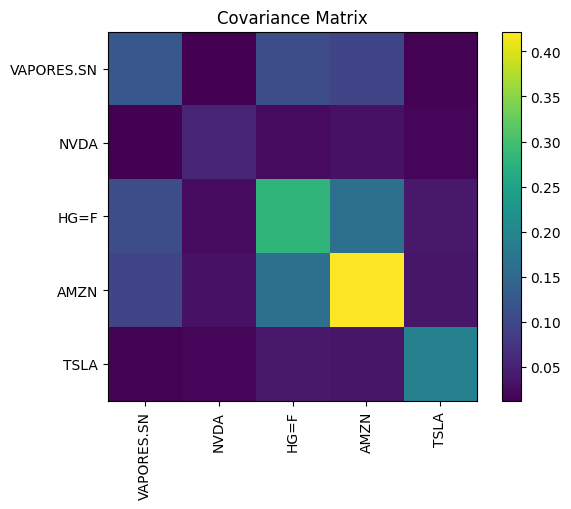

In [13]:
plt.imshow(annual_cov_matrix)
plt.colorbar()
plt.xticks(range(len(tickers)), tickers, rotation=90)
plt.yticks(range(len(tickers)), tickers)
plt.title( "Covariance Matrix" )
plt.show()

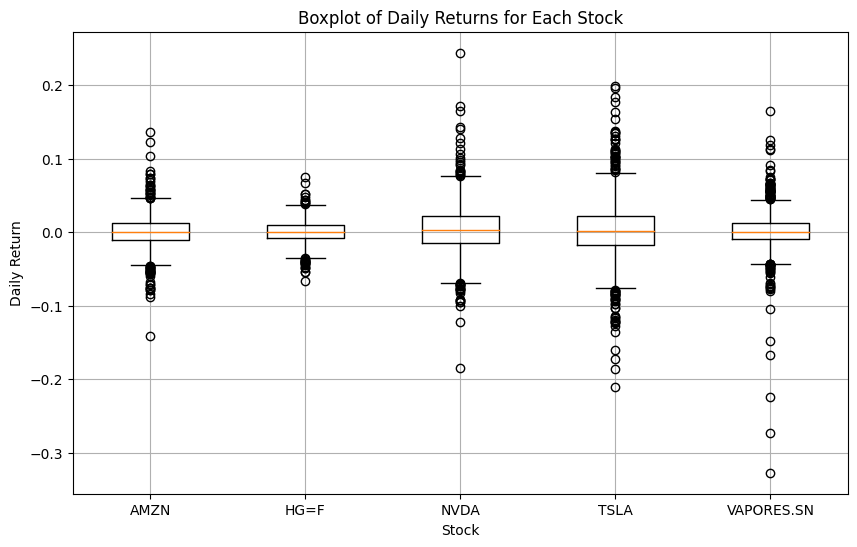

In [14]:
stock_returns = [returns[ticker] for ticker in returns.columns]
plt.figure(figsize=(10, 6))
plt.boxplot(stock_returns, labels=returns.columns)
plt.title('Boxplot of Daily Returns for Each Stock')
plt.ylabel('Daily Return')
plt.xlabel('Stock')
plt.grid(True)
plt.show()

To obtain the optimal weights of each asset on the portfolio, first we have to build the necessary funtions:
- portfolio_performance: calculate expected return and standareviation of a portfolio given the weights, expected returns and covariance matrix of assets' returns. It computes the two primary metrics needed to assess a portfolio's performance.
- neg_sharpe_ratio: Calculates the negative Sharpe ratio of a portfolio given the weights. This metric tells us which is the best portfolio in terms of risk-adjusted return and since the available optimizers are designed to minimize and not maximize, we minimize the negative Sharpe ratio, which is the same as maximizing the Sharpe ratio.
- portfolio_variance: calculates the variance of a portfolio for given weights. It is used as objective function when the goal is to find the portfolio with the minimun possible risk, regardless of return.
- minimize_variance: minimize portfolio variance subject to a target return constraint. It's usefull to find the minimum variance portfolio for each level of return.

In [15]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_returns, p_std = portfolio_performance(weights, mean_returns, cov_matrix)
    return - (p_returns - risk_free_rate) / p_std

def portfolio_variance(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1] ** 2

def minimize_variance(weights, mean_returns, cov_matrix, target_return):
    returns = np.sum(mean_returns * weights)
    variance = portfolio_variance(weights, mean_returns, cov_matrix)
    return variance if returns >= target_return else np.inf

In [16]:
num_assets = len(tickers)

initial_weights = num_assets * [1. / num_assets,]

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0, 1) for asset in range(num_assets))

In [17]:
risk_free_rate = 0.02

optimized_sharpe = minimize(neg_sharpe_ratio, initial_weights,
                            args=(mean_annual_returns, annual_cov_matrix, risk_free_rate),
                            method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_sharpe = optimized_sharpe.x

max_sharpe_return, max_sharpe_std = portfolio_performance(optimal_weights_sharpe, mean_annual_returns, annual_cov_matrix)
max_sharpe_ratio = (max_sharpe_return - risk_free_rate) / max_sharpe_std

In [18]:
max_sharpe_ratio

1.567926566874575

In [19]:
min_variance = minimize(portfolio_variance, initial_weights,
                        args=(mean_annual_returns, annual_cov_matrix),
                        method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_min_var = min_variance.x

min_var_return, min_var_std = portfolio_performance(optimal_weights_min_var, mean_annual_returns, annual_cov_matrix)

In [20]:
def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficient_portfolios = []
    for ret in returns_range:
        constraints = (
            {'type': 'eq', 'fun': lambda x: portfolio_performance(x, mean_returns, cov_matrix)[0] - ret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
        )
        result = minimize(portfolio_variance, initial_weights, args=(mean_returns, cov_matrix),
                          method='SLSQP', bounds=bounds, constraints=constraints)
        if result.success:
            efficient_portfolios.append({'Return': ret, 'Volatility': np.sqrt(result.fun)})
    return efficient_portfolios

target_returns = np.linspace(min(mean_annual_returns), max(mean_annual_returns), 50)

efficient_portfolios = efficient_frontier(mean_annual_returns, annual_cov_matrix, target_returns)

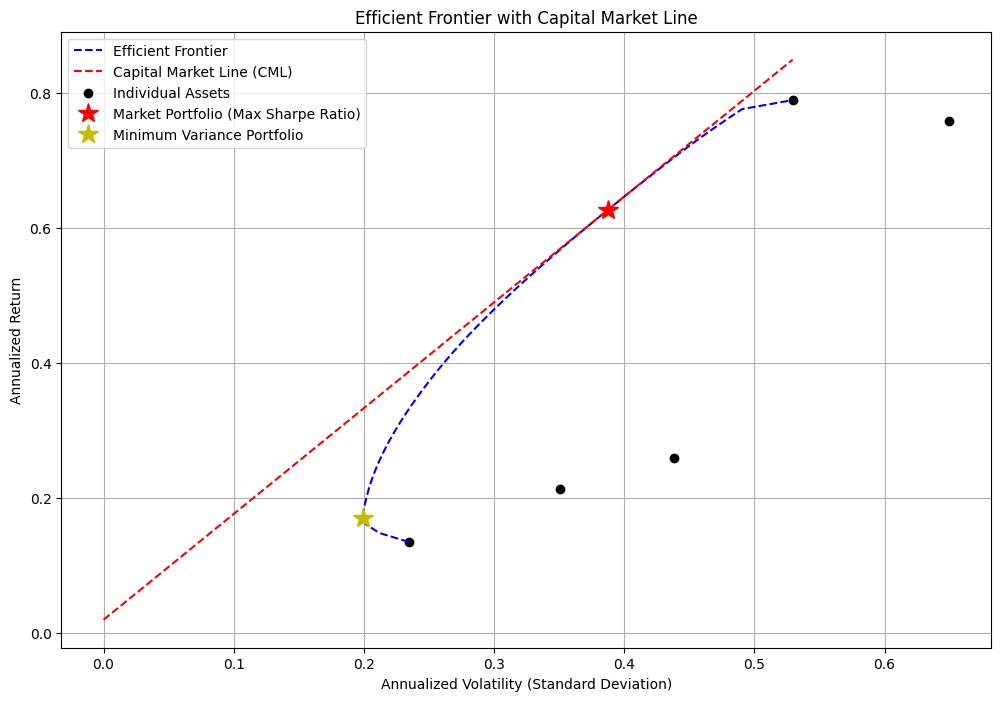

In [27]:
frontier_returns = [p['Return'] for p in efficient_portfolios]
frontier_volatility = [p['Volatility'] for p in efficient_portfolios]

cml_volatility = np.linspace(0, max(frontier_volatility), 100)
cml_returns = risk_free_rate + (max_sharpe_return - risk_free_rate) / max_sharpe_std * cml_volatility

plt.figure(figsize=(12, 8))
plt.plot(frontier_volatility, frontier_returns, 'b--', label='Efficient Frontier')
plt.plot(cml_volatility, cml_returns, 'r--', label='Capital Market Line (CML)')
plt.scatter(np.sqrt(np.diag(annual_cov_matrix)), mean_annual_returns, marker='o', color='black', label='Individual Assets')
plt.plot(max_sharpe_std, max_sharpe_return, 'r*', markersize=15, label='Market Portfolio (Max Sharpe Ratio)')
plt.plot(min_var_std, min_var_return, 'y*', markersize=15, label='Minimum Variance Portfolio')
plt.title('Efficient Frontier with Capital Market Line')
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

- **Efficient Frontier** Represent the set of optimal portfolio offering the highest expected return for a given level of risk.
- **Capital Market Line** Shows the risk-return trade off of portfolios that combine the risk-free asset with teh market portfolio.
- **Individual Assets** Plotted as black dots, showing each asset's own risk and return profile.
- **Market Portfolio (Max Sharpe Ratio)** The optimal risky portfolio investors should hold when combining with the risk-free asset.
- **Minimum Variance Portfolio** The portfolio with the lowest possible risk for investors who desire minimal risk.

<Axes: xlabel='Ticker'>

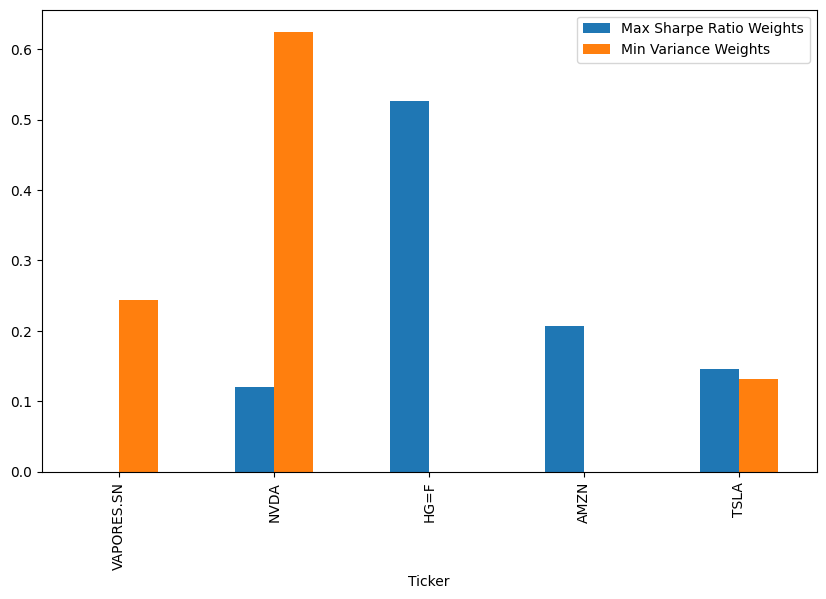

In [28]:
weights_df = pd.DataFrame({
    'Ticker': tickers,
    'Max Sharpe Ratio Weights': optimal_weights_sharpe,
    'Min Variance Weights': optimal_weights_min_var
})

weights_df.plot.bar(x='Ticker', figsize=(10, 6))

In this project, we successfully applied Modern Portfolio Theory (**MPT**) to optimize a portfolio comprising selected stocks. By harnessing Python and its powerful libraries, we collected historical price data, calculated daily and annualized returns, and constructed the covariance matrix of asset returns. Through the optimization process, we identified the portfolio with the maximum Sharpe Ratio, representing the optimal risk-adjusted return, and the minimum variance portfolio, catering to risk-averse investors seeking the lowest possible risk.

We visualized the **Efficient Frontier**, illustrating the optimal trade-off between risk and return for different portfolio compositions. The addition of the Capital Market Line (**CML**) enriched our analysis by highlighting the benefits of *combining the risk-free asset with the market portfolio (the portfolio with the highest Sharpe Ratio)*. This visualization emphasized the importance of the market portfolio as the optimal risky asset when a risk-free asset is available.

Our findings underscore the practical utility of MPT in constructing efficient portfolios and making informed investment decisions. By integrating real market data with quantitative optimization techniques, we demonstrated how investors can tailor their portfolios to align with their risk tolerance and return objectives. This project not only reinforces foundational financial concepts but also showcases the effectiveness of data science tools in solving complex financial problems.

Moving forward, this framework can be extended to include additional constraints, such as transaction costs, leverage limits, or asset-specific considerations. Moreover, incorporating different asset classes or exploring alternative optimization models could provide deeper insights and enhance portfolio diversification. Ultimately, this project serves as a robust foundation for further exploration in portfolio management and financial risk analysis.